In [1]:
X <- read.csv("./data/X.csv", header = TRUE)
y <- read.csv("./data/y.csv", header = TRUE)

In [3]:
data <- cbind(X, y)

indices <- 1:nrow(data)
set.seed(123) # <= 
shuffled_indices <- sample(indices) 
train_size <- floor(0.7 * length(indices)) # <=

train_indices <- shuffled_indices[1:train_size]
test_indices <- shuffled_indices[(train_size + 1):length(indices)]
train_data <- data[train_indices, ]
test_data <- data[test_indices, ]

In [4]:
library('MASS')
library('caret')

logit_model <- glm(dod ~ ., data = train_data, family = binomial)
step_model <- stepAIC(logit_model, direction = "both")
summary.glm(step_model)

ci <- confint(step_model)
exp(cbind(OR <- coef(step_model), ci))

predictions <- predict(step_model, test_data, type="response")

Loading required package: ggplot2

Loading required package: lattice



Start:  AIC=1046.6
dod ~ gender + age + X00845 + X0389 + X2449 + X25000 + X2639 + 
    X2720 + X2724 + X2761 + X2762 + X27651 + X27652 + X2767 + 
    X2768 + X27800 + X2800 + X2809 + X2851 + X28529 + X2859 + 
    X2875 + X28860 + X30000 + X3004 + X3051 + X311 + X32723 + 
    X33829 + X34690 + X4019 + X40390 + X412 + X41401 + X42731 + 
    X42789 + X4280 + X4589 + X486 + X49390 + X496 + X51881 + 
    X53081 + X5589 + X5601 + X56089 + X5609 + X56210 + X56400 + 
    X56722 + X5680 + X5849 + X5859 + X5990 + X71590 + X73300 + 
    X73390 + X78052 + X78060 + X78321 + X7840 + X7850 + X78659 + 
    X78701 + X78702 + X78791 + X78820 + X78900 + X79092 + X99592 + 
    X99859 + D649 + E785 + E8490 + E8497 + E8782 + E8788 + E8798 + 
    E9320 + F329 + F419 + I10 + K219 + K5090 + K5190 + N179 + 
    V1251 + V1279 + V1582 + V442 + V4572 + V4589 + V4986 + V552 + 
    V5861 + V5865 + V5866 + V5867 + V5869 + Y929 + Z87891 + Z9049

         Df Deviance    AIC
- E8798   1   840.61 1044.6
- X73390  1   840


Call:
glm(formula = dod ~ age + X25000 + X2761 + X2762 + X2767 + X27800 + 
    X28529 + X2875 + X3051 + X311 + X32723 + X4019 + X40390 + 
    X412 + X4280 + X4589 + X496 + X51881 + X5589 + X56089 + X56722 + 
    X5990 + X78659 + X99592 + X99859 + D649 + F419 + N179 + V1582 + 
    V442 + V4986 + V5866 + Z9049, family = binomial, data = train_data)

Coefficients:
            Estimate Std. Error z value Pr(>|z|)    
(Intercept)  -4.0401     0.2178 -18.552  < 2e-16 ***
age           1.4512     0.2157   6.728 1.73e-11 ***
X25000        0.6138     0.2394   2.564 0.010351 *  
X2761         0.5554     0.2407   2.307 0.021034 *  
X2762         0.7095     0.2641   2.686 0.007234 ** 
X2767        -0.4973     0.3210  -1.549 0.121357    
X27800       -0.7355     0.3666  -2.006 0.044859 *  
X28529        0.4896     0.3090   1.584 0.113129    
X2875         0.6102     0.2914   2.094 0.036238 *  
X3051         0.7137     0.2654   2.689 0.007169 ** 
X311          0.5025     0.2145   2.343 0.019121 *  

Waiting for profiling to be done...



,,2.5 %,97.5 %
(Intercept),0.01759506,0.0112623,0.02648252
age,4.26822694,2.8103948,6.55608796
X25000,1.84741536,1.1500741,2.94326158
X2761,1.74262345,1.0814442,2.78227651
X2762,2.03290381,1.2061762,3.40218967
X2767,0.60818730,0.3210137,1.13180935
X27800,0.47927346,0.2276748,0.96096110
X28529,1.63160369,0.8822061,2.96830506
X2875,1.84072821,1.0363499,3.25318364
X3051,2.04151374,1.2026695,3.41130093


In [5]:
# Performance
confusion_matrix <- table(test_data[, ncol(test_data)], ifelse(predictions > 0.5, 1, 0))
## 计算准确率
accuracy <- sum(diag(confusion_matrix)) / sum(confusion_matrix)
cat("Accuracy:", accuracy, "\n")

## 计算召回率
recall <- diag(confusion_matrix) / rowSums(confusion_matrix)
cat("Recall:", recall, "\n")

## 计算F1分数
precision <- diag(confusion_matrix) / colSums(confusion_matrix)
f1_score <- 2 * (precision * recall) / (precision + recall)
cat("F1 Score:", f1_score, "\n")

Accuracy: 0.8553719 
Recall: 0.9381107 0.4017857 
F1 Score: 0.9164678 0.4615385 


Type 'citation("pROC")' for a citation.


Attaching package: ‘pROC’


The following objects are masked from ‘package:stats’:

    cov, smooth, var


Setting levels: control = 0, case = 1

Setting direction: controls < cases



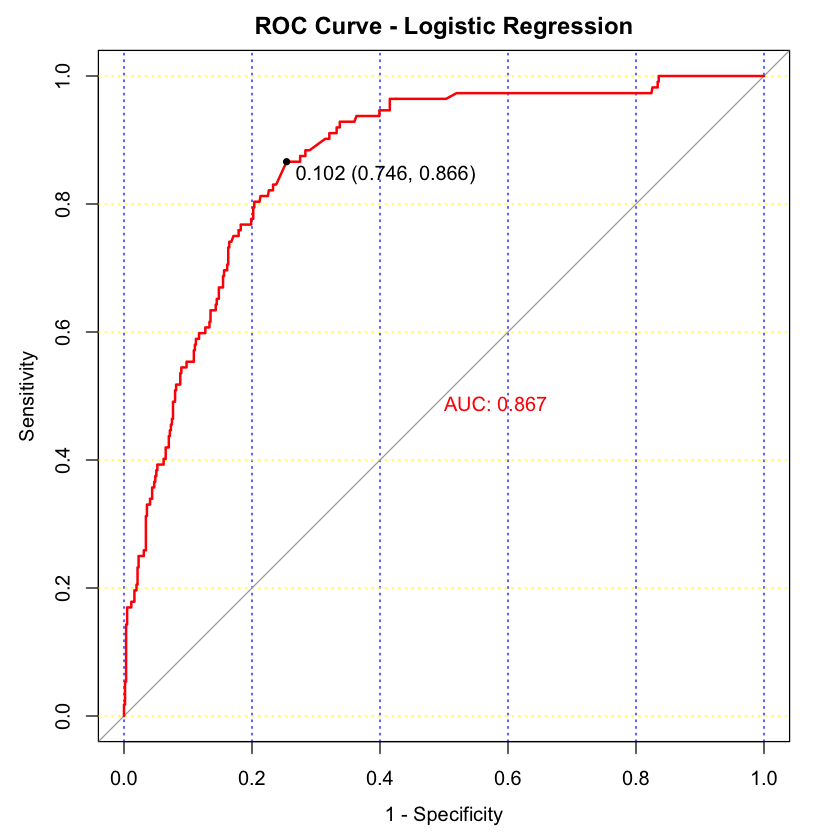

In [6]:
# ROC Curve
library(pROC)
roc_obj <- roc(test_data[, ncol(test_data)], predictions)

plot(
  roc_obj,
  col = "red", 
  main = "ROC Curve - Logistic Regression",
  legacy.axes = T, # y轴格式更改
  print.auc = TRUE, # 显示AUC面积
  print.thres = TRUE, # 添加截点和95%CI
  grid=c(0.2,0.2),
  grid.col=c("blue","yellow")
)